# Libraries

In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import sidetable as stb

# Statistics
from scipy.stats import chi2_contingency, ttest_ind

# Library settings

Set aspects of the visual theme for all matplotlib and seaborn plots.
This function changes the global defaults for all plots using the matplotlib rcParams system. The themeing is decomposed into several distinct sets of parameter values.

See [seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

In [2]:
sns.set_theme(
    context='notebook',
    style='ticks',
    palette='colorblind'
)

# Custom functions

# Load dataset

In [3]:
# Load data
df = pd.read_csv(f'../data/raw/streaming_data.csv')
df.head(5)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# 1 - Business Understanding

|feature|description|type|
|-------|-----------|----|
|User_id|Customer identification code|String|
|age|Customer age|int|
|gender|Customer gender|string|
|region|Customer's region of origin|string|
|subscription_days|Customer's days of active subscription|int|
|subscription_type|Account type|string|
|num_contents|Watched contents amount|int|
|avg_rating|Average rating of platform content|int|
|num_active_profiles|Number of active profiles|int|
|num_streaming_services|Number of streaming services that customer own|int|
|devices_connected|Number of devices connected to the account|int|
|churned|if customer cancelled account or not|int|

# 2 - Data Understanding

In [4]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [5]:
# Dataframe descriptive statistics
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [6]:
# Missing values
df.stb.missing()

,missing,total,percent
Num_streaming_services,68312,77884,87.709928
Subscription_type,25221,77884,32.382774
Devices_connected,25188,77884,32.340404
Time_on_platform,21420,77884,27.502440
Avg_rating,17270,77884,22.174002
Churned,16736,77884,21.488367
Gender,14516,77884,18.637974
Age,11277,77884,14.479226
Num_active_profiles,0,77884,0.000000
User_id,0,77884,0.000000


<Axes: >

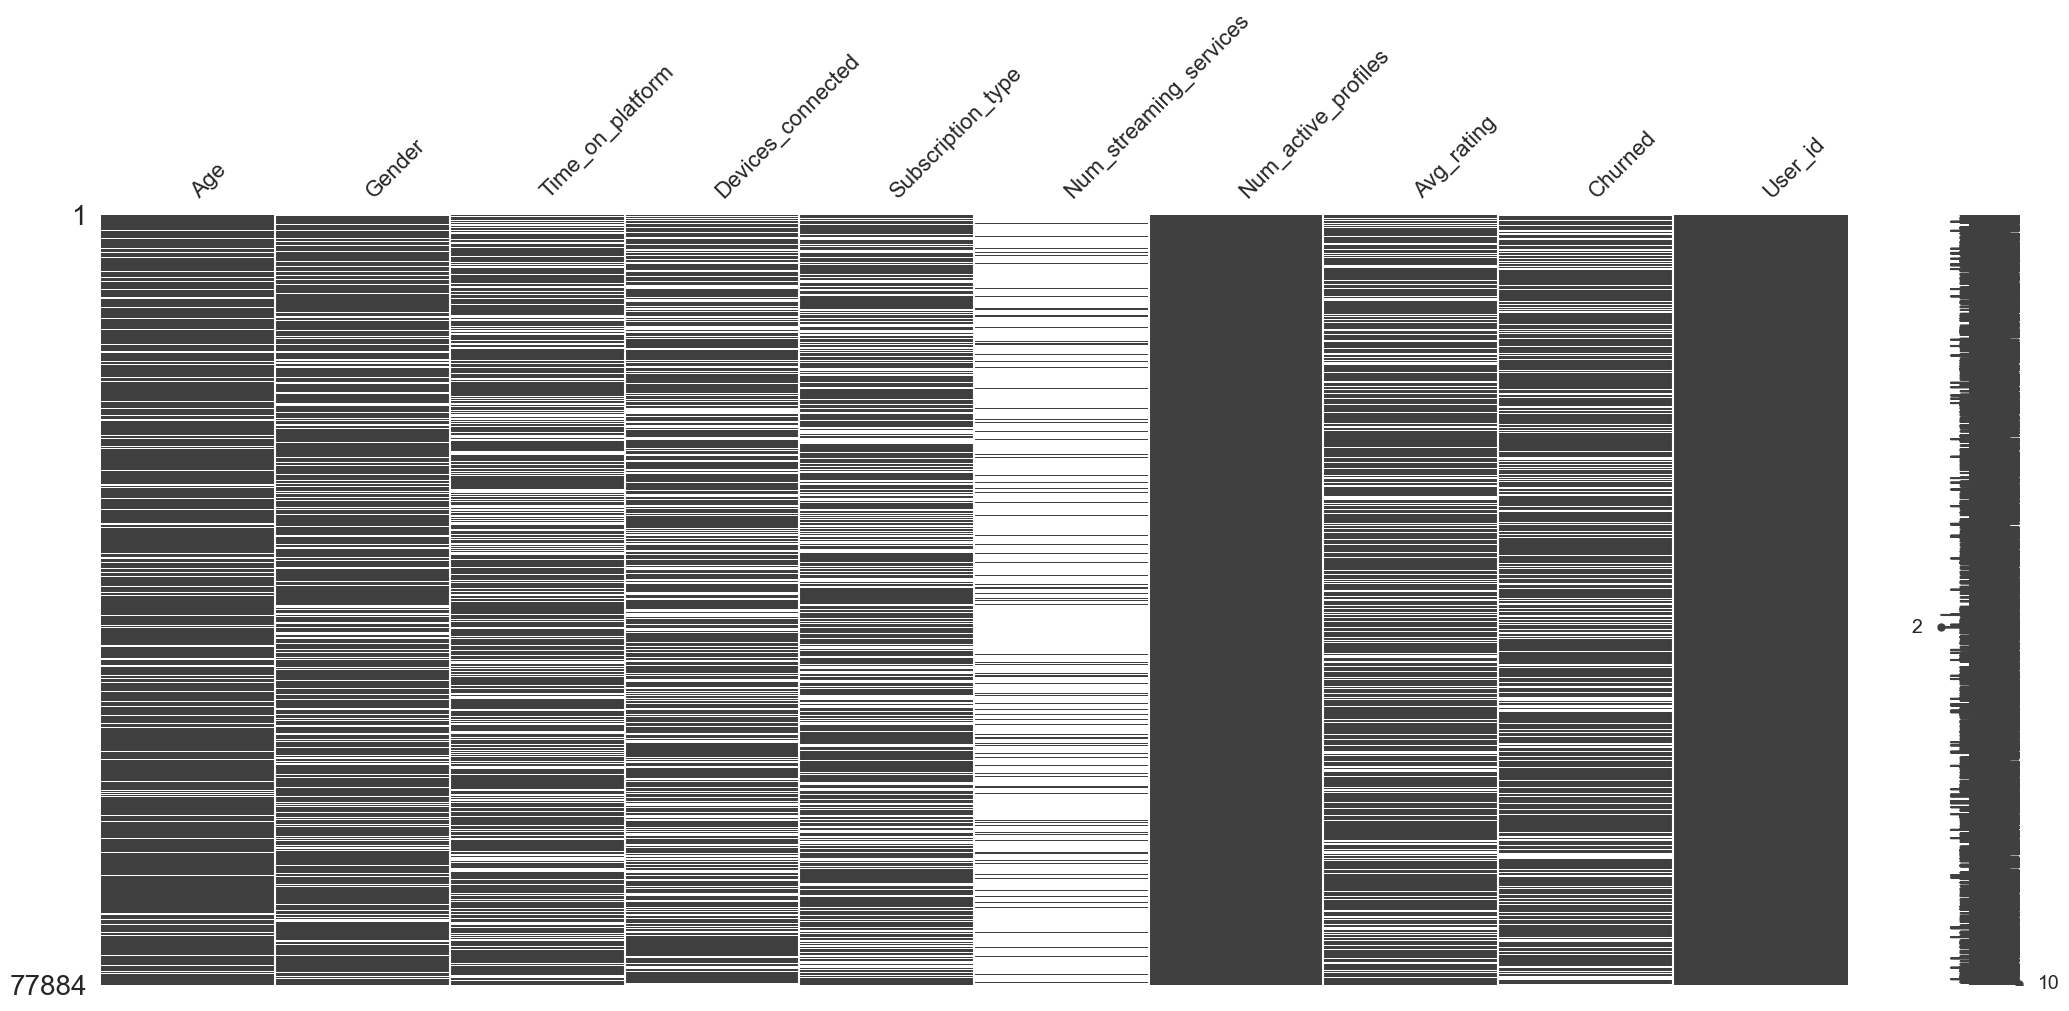

In [7]:
# Missing values
missingno.matrix(df)

In [8]:
# Duplicated rows
print(df.duplicated().sum())

# Duplicated ID
print(df.duplicated('User_id').sum())

12403
12403


In [9]:
# Target classes
display(df['Churned'].value_counts(normalize=True) * 100)

Churned
0.0    75.6934
1.0    24.3066
Name: proportion, dtype: float64

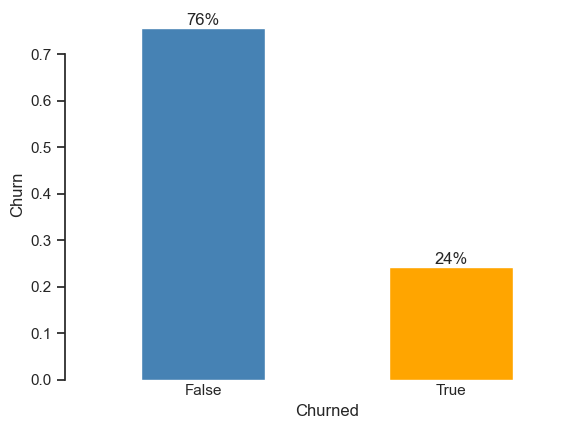

In [10]:
# Target classes distribution
fig, ax = plt.subplots()
percentages = (
    df['Churned']
    .map({1.0: True, 0.0: False})
    .value_counts(normalize=True)
)
percentages.plot(kind='bar', color=['steelblue', 'orange'])
ax.set_ylabel('Churn')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for i, percentage in enumerate(percentages):
    ax.text(i, percentage, f'{percentage:.0%}', ha='center', va='bottom')
    ax.tick_params(axis='x', which='both', length=0)
    sns.despine(bottom=True, trim=True, offset=10)

## 3 - Data Preparation

In [11]:
# Drop User_id feature
df = df.drop(columns='User_id')

In [12]:
# Drop duplicateds
df = df.drop_duplicates(keep='first')

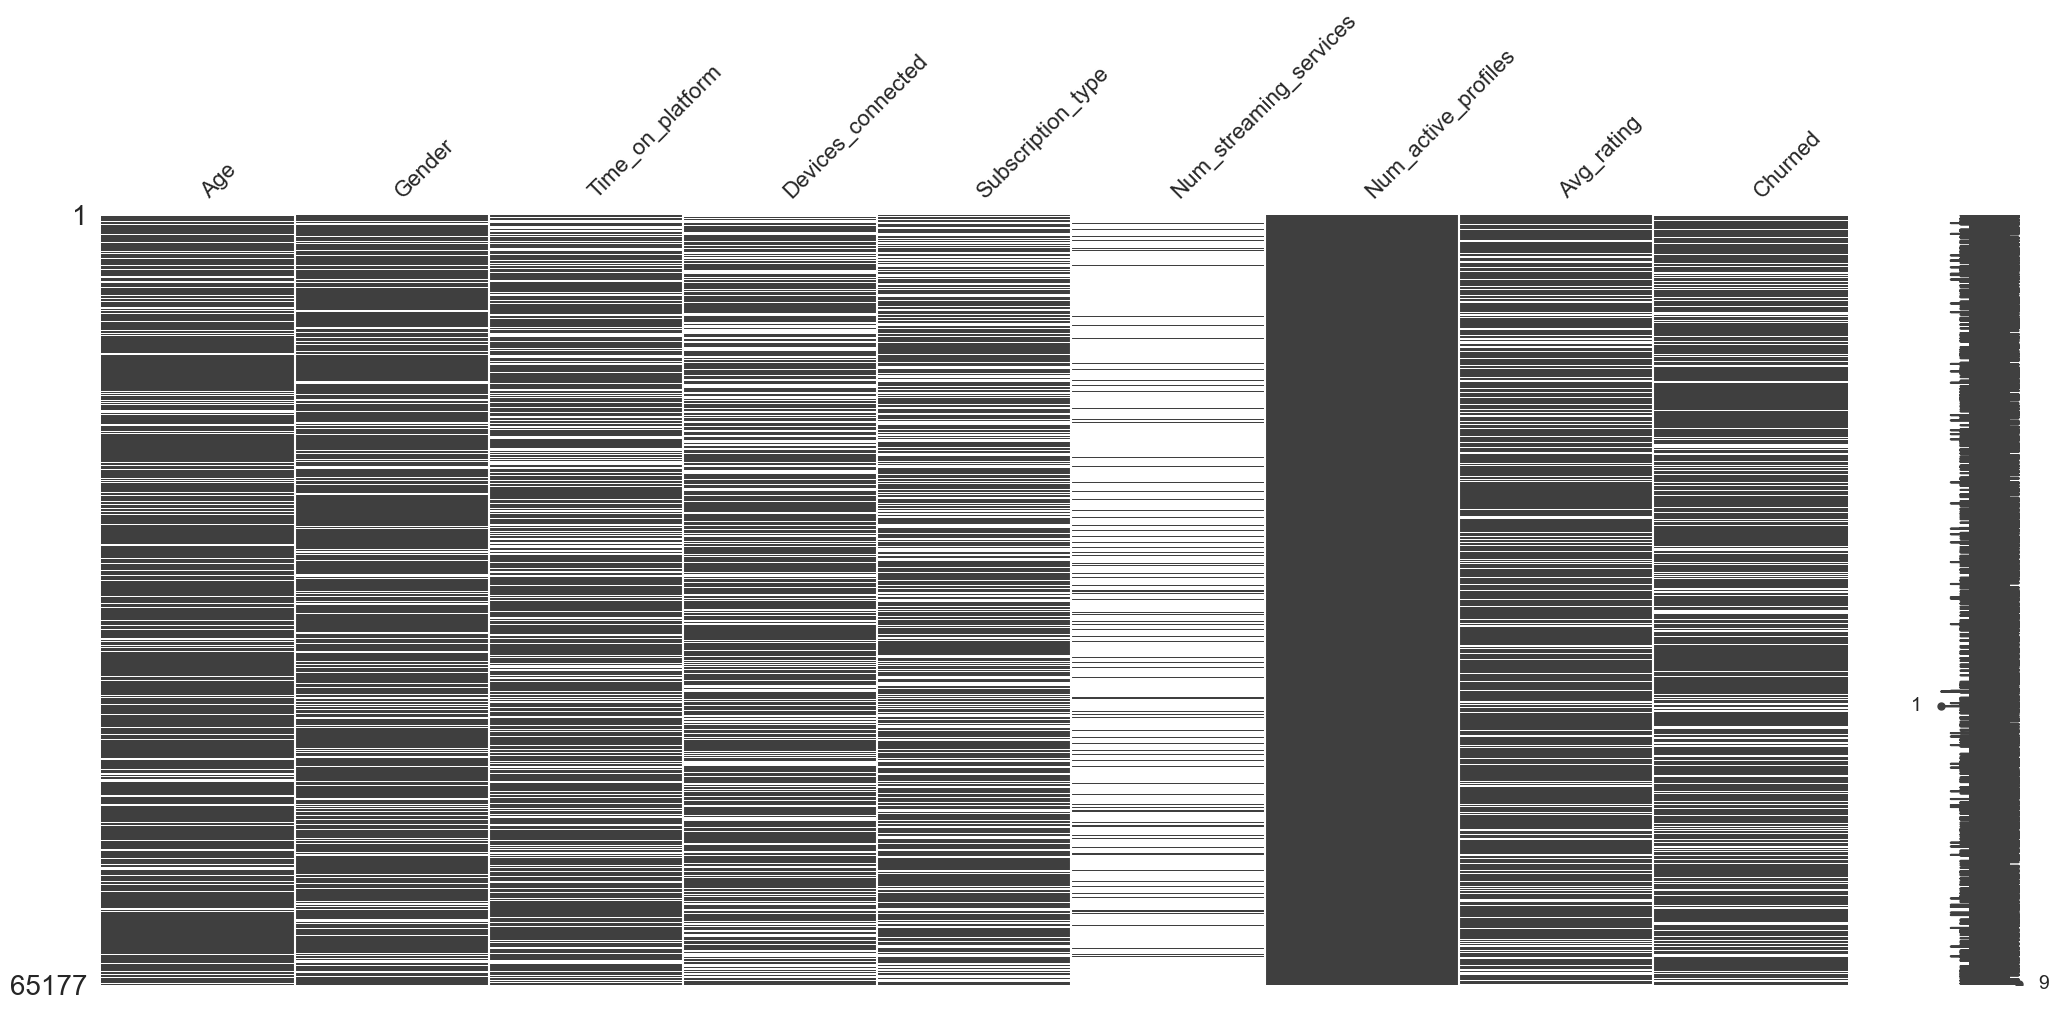

In [13]:
# Missing values after dropping duplicateds
missingno.matrix(df);

In [14]:
# Missing values after dropping duplicateds
df.stb.missing()

,missing,total,percent
Num_streaming_services,57089,65177,87.590715
Devices_connected,21049,65177,32.295135
Subscription_type,21049,65177,32.295135
Time_on_platform,17661,65177,27.096982
Avg_rating,14211,65177,21.803704
Churned,14073,65177,21.591973
Gender,12144,65177,18.632340
Age,9327,65177,14.310263
Num_active_profiles,0,65177,0.000000


Even after dropping duplicateds 'Num_streaming_services' has ~88% of missing values. Dropping rows with missing values based on this column implies in a huge lost of information. A study of association will be performed. Depending on results of this study it can be more favorable to drop the column to deal with missing values.

## 3.1 - Association between target and categorical features

In [15]:
# Numerical features
num_cols = df.select_dtypes('number').columns.drop('Churned').to_list()

# Categorical features
cat_cols = df.select_dtypes(exclude='number').columns.to_list()

In [16]:
# Create a df dropping missing values for association study
df_drop = df.dropna()

In [17]:
# Create dataframe with p-value and chi2 value
df_chi2 = pd.DataFrame(
    {cat_col: chi2_contingency(
        pd.crosstab(df_drop[cat_col], df_drop['Churned']),
        correction=True)[:2] \
    for cat_col in cat_cols},
    index=['chi2', 'p-value']
)


In [18]:
df_chi2.T.style.background_gradient(cmap='Reds')

,chi2,p-value
Gender,1.659968,0.197608
Subscription_type,0.808906,0.667342


## 3.2 - Association between target and numerical features

Given pvalues > 0.5, there isn't evidence to reject null hypothesis. It suggests that there isn't association between categorical features with target.

In [19]:
# Create dataframe with p-value and ttest value
df_ttest = pd.DataFrame(
    {ttest_ind(df_drop[df_drop['Churned'] == 1][num_col],
          df_drop[df_drop['Churned'] == 0][num_col])[:2] \
    for num_col in num_cols},
    index=[num_cols],
    columns=['ttest', 'p-value']
)

In [20]:
df_ttest.style.background_gradient(cmap='Reds')

,ttest,p-value
Age,2.768881,0.005711
Time_on_platform,1.717548,0.086136
Devices_connected,-0.305312,0.760181
Num_streaming_services,-1.198771,0.230852
Num_active_profiles,-0.976550,0.328988
Avg_rating,-0.427275,0.669256


The p-values < 0.5 for 'Age' and 'Time_on_platform' features suggest that there is sufficient evidence to reject the null hypothesis that there aren't association between this features and target variable. Based in 'Num_streaming_Services' p-value, this feature will be dropped to deal with missing values. After that, all rows with missing values will be dropped. In a real case, it would be more interesting communicate clients about missing values in dataset.

In [21]:
# Drop 'Num_streaming_services' from dataset
df = df.drop(columns='Num_streaming_services')
df.stb.missing()

,missing,total,percent
Devices_connected,21049,65177,32.295135
Subscription_type,21049,65177,32.295135
Time_on_platform,17661,65177,27.096982
Avg_rating,14211,65177,21.803704
Churned,14073,65177,21.591973
Gender,12144,65177,18.632340
Age,9327,65177,14.310263
Num_active_profiles,0,65177,0.000000


'Devices_connected' and 'Subscription_type' also have a high p-value for T test. As its percntage of missing values aren't too higher from 'Time_on_platform' that seems to have association with target variable, these features will be maintained.

In [22]:
# Lost of information by dropping all missing values
display(df.dropna().stb.missing())
print(f'Lost of information: {(df.shape[0] - df.dropna().shape[0]) / df.shape[0]:.0%}')

,missing,total,percent
Age,0,9307,0.0
Gender,0,9307,0.0
Time_on_platform,0,9307,0.0
Devices_connected,0,9307,0.0
Subscription_type,0,9307,0.0
Num_active_profiles,0,9307,0.0
Avg_rating,0,9307,0.0
Churned,0,9307,0.0


Lost of information: 86%


In [23]:
# Verify data quality before dealing with missing values
df.describe()

,Age,Time_on_platform,Devices_connected,Num_active_profiles,Avg_rating,Churned
count,55850.000000,47516.000000,44128.000000,65177.000000,50966.000000,51104.000000
mean,43.538962,4385.022456,2.998799,3.000921,3.003971,0.244814
std,15.042654,2528.167615,1.414622,1.412248,1.154425,0.429981
min,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2194.000000,2.000000,2.000000,2.000000,0.000000
50%,44.000000,4387.000000,3.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,5.000000,5.000000,1.000000


Description of data shows that aren't problems with numerical values (e.g., negative data in 'Age').

In [24]:
df.dtypes

Age                    float64
Gender                  object
Time_on_platform       float64
Devices_connected      float64
Subscription_type       object
Num_active_profiles      int64
Avg_rating             float64
Churned                float64
dtype: object

In [25]:
# Drop rows with missing values in 'Gender' and 'Churned'
df = df.dropna(subset=('Gender', 'Churned'))


# Replace missing values
num_cols = df.select_dtypes(include='number').columns.drop('Churned').to_list()
df.loc[:, num_cols] = df[num_cols].fillna(
    df[num_cols].median())
df.loc[:, 'Subscription_type'] = df['Subscription_type'].fillna(
    df['Subscription_type'].mode()[0]
)

About numerical features, only 'Avg_rating' must stay as float64, all another are discrete. The datatype will be changed after dealing with missing values.  

For 'Gender', as this feature has only two categories if missing values are replaced by mode, a high bias would be introduced to dataset. Therefore, missing values in gender will be dropped.

For missing values in 'Churned', replacing by mode would be introduce bias to dataset, the rows with missing values in 'Churned' will be dropped.

Missing values in'Subscription_type' will be replaced by mode, while missing values in numerical features will be replaced by median.

In [26]:
# Drop target from df
target = df['Churned']
df = df.drop(columns='Churned')

# Convert some float64 to int64
cols2int = num_cols.copy()
num_cols.remove('Avg_rating')
df[cols2int] = df[cols2int].astype('int64')

# Convert categorical from object to category
df[cat_cols] = df[cat_cols].astype('category')

In [27]:
df.stb.missing()

,missing,total,percent
Age,0,41566,0.0
Gender,0,41566,0.0
Time_on_platform,0,41566,0.0
Devices_connected,0,41566,0.0
Subscription_type,0,41566,0.0
Num_active_profiles,0,41566,0.0
Avg_rating,0,41566,0.0


In [28]:
# Saving treated dataset
df.to_csv(f'../data/processed/streaming_data.csv', index=False)